In [130]:
#Image Manipulation
from skimage import data, color
from skimage.filters import threshold_otsu, try_all_threshold, sobel

#Data Manipulation
import inspect
import matplotlib.pyplot as plt
import pandas as pd

#Tensorflow & Keras
from tensorflow import *
from keras.layers import Dense
from tensorflow.keras.models import Sequential

#Python Native
import os

In [118]:
def show_image(image, title="Image",cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [131]:
img = "0a3e62e3-fac5-4648-9da2-f6bc4074ee31.jpg"

In [132]:
img = plt.imread(img)

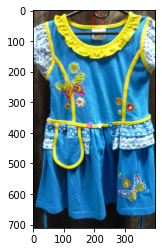

In [133]:
plt.imshow(img)

In [134]:
img.shape

(711, 400, 3)

In [135]:
img_gray = color.rgb2gray(img)

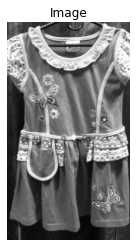

In [136]:
show_image(img_gray)

In [137]:
img_gray.shape

(711, 400)

In [138]:
cont = sobel(img_gray)

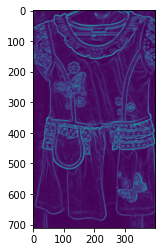

In [139]:
plt.imshow(cont)

In [18]:
thresh = threshold_otsu(img)

In [19]:
binary_global = img > thresh

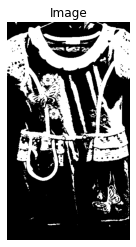

In [20]:
show_image(binary_global)

In [21]:
edge_img = sobel(img)

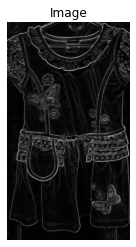

In [22]:
show_image(edge_img)

In [23]:
directory = "/home/sergei/Public/BeCode/Projects/archive/images_compressed"

In [24]:
file_names = []
file_array = []
for i,file in enumerate(os.listdir(directory)):
    path = os.path.join(directory,file)
    try:
        img = color.rgb2gray(plt.imread(path))
        #skimage.filters.sobel adds contours
        img = sobel(img)
        file_names.append(file)
        file_array.append(img)
    except:
        file_names.append(None)
        file_array.append(None)
    

In [25]:
len(file_names)

5759

In [26]:
file_array[0].shape


(711, 400)

In [27]:
file_array[0]

array([[0.00277297, 0.00404226, 0.00499904, ..., 0.0168673 , 0.01663781,
        0.01663781],
       [0.00490196, 0.00438445, 0.00527957, ..., 0.03062843, 0.03050265,
        0.03050265],
       [0.00309173, 0.00422195, 0.00373901, ..., 0.01960784, 0.01941077,
        0.01941077],
       ...,
       [0.00903877, 0.01031574, 0.01150053, ..., 0.04095411, 0.0512999 ,
        0.05684584],
       [0.00990282, 0.00951509, 0.00872387, ..., 0.03534854, 0.03843587,
        0.0388463 ],
       [0.00435689, 0.00413521, 0.00338429, ..., 0.01376046, 0.00930082,
        0.00627757]])

In [10]:
file_array[57].shape

IndexError: list index out of range

In [11]:
plt.imshow(file_array[6])

IndexError: list index out of range

In [49]:
df = pd.DataFrame({"image":file_names,"array":file_array})

In [50]:
df.dropna(inplace=True)

In [43]:
df["name"]

0       51ec2329-7f56-4cec-ae5e-a40b7f79268a.jpg
1       fa064993-f459-457a-bdfb-69a2832e15da.jpg
2       e580170f-d447-4d58-ac33-3d40b3771c8f.jpg
3       dda1ef86-5eca-4690-9aeb-e24a87f3c2e6.jpg
4       57288490-69be-4a59-9021-552daa78ace3.jpg
                          ...                   
5754    6361debd-1437-4d04-acc2-f9dae8157d5c.jpg
5755    ed371c5e-c1ef-4e87-b8b5-96951450af2b.jpg
5756    3982179b-1523-4cea-868d-4dd3e71779b0.jpg
5757    51c73057-ed52-4bf3-afa8-34a015301565.jpg
5758    18e8eae2-79a9-4ec2-87b7-a9f3766e90e4.jpg
Name: name, Length: 5756, dtype: object

In [51]:
df["image"] = df["image"].apply(lambda x: x.replace(".jpg",""))

In [52]:
df["image"]

0       51ec2329-7f56-4cec-ae5e-a40b7f79268a
1       fa064993-f459-457a-bdfb-69a2832e15da
2       e580170f-d447-4d58-ac33-3d40b3771c8f
3       dda1ef86-5eca-4690-9aeb-e24a87f3c2e6
4       57288490-69be-4a59-9021-552daa78ace3
                        ...                 
5754    6361debd-1437-4d04-acc2-f9dae8157d5c
5755    ed371c5e-c1ef-4e87-b8b5-96951450af2b
5756    3982179b-1523-4cea-868d-4dd3e71779b0
5757    51c73057-ed52-4bf3-afa8-34a015301565
5758    18e8eae2-79a9-4ec2-87b7-a9f3766e90e4
Name: image, Length: 5756, dtype: object

In [53]:
images = pd.read_csv("/home/sergei/Public/BeCode/Projects/archive/images.csv")

In [57]:
df = df.merge(images, on=["image"])

In [93]:
df = df[df["label"]!="Not sure"]

In [94]:
df["label"].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip             7
Name: label, dtype: int64

In [95]:
label = df["label"].value_counts()
len(label)

19

In [96]:
labels = df["label"].unique()

In [97]:
labels = {l:i for i,l in enumerate(labels)}


In [100]:
labels

{'T-Shirt': 0,
 'Outwear': 1,
 'Longsleeve': 2,
 'Shorts': 3,
 'Pants': 4,
 'Shoes': 5,
 'Undershirt': 6,
 'Shirt': 7,
 'Dress': 8,
 'Hat': 9,
 'Body': 10,
 'Other': 11,
 'Hoodie': 12,
 'Blazer': 13,
 'Skirt': 14,
 'Polo': 15,
 'Skip': 16,
 'Top': 17,
 'Blouse': 18}

In [101]:
df["num_label"] = df["label"].map(labels)

<ipython-input-101-179ca7063267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_label"] = df["label"].map(labels)


In [104]:
df.drop(["sender_id", "label", "kids"], axis=1, inplace=True)

/home/sergei/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [106]:
df.set_index("image")

,array,num_label
image,,
51ec2329-7f56-4cec-ae5e-a40b7f79268a,"[[0.0027729677693590095, 0.0040422604172722105...",0
fa064993-f459-457a-bdfb-69a2832e15da,"[[0.006200544431702805, 0.0029411764705882105,...",0
e580170f-d447-4d58-ac33-3d40b3771c8f,"[[0.011433239009500558, 0.025110291127187642, ...",1
dda1ef86-5eca-4690-9aeb-e24a87f3c2e6,"[[0.04310381948427565, 0.04884281845914168, 0....",2
01420fed-89b3-4801-9d91-af5507322fa3,"[[1.9626155733547187e-17, 0.002772967769359029...",1
...,...,...
6361debd-1437-4d04-acc2-f9dae8157d5c,"[[0.037753912818952934, 0.03386877815053603, 0...",2
ed371c5e-c1ef-4e87-b8b5-96951450af2b,"[[0.004042260417272269, 0.0041594516540385, 0....",1
3982179b-1523-4cea-868d-4dd3e71779b0,"[[0.020115965224199207, 0.019711773270293033, ...",2


In [140]:
!git 